In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.tsv', sep='\t')

In [3]:
titanic_df.head()

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,1,female,35.0,1,0,53.1000,S
1,4,0,3,male,35.0,0,0,8.0500,S
2,7,0,3,male,2.0,3,1,21.0750,S
3,9,1,2,female,14.0,1,0,30.0708,C
4,11,1,1,female,58.0,0,0,26.5500,S


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

C:\Users\unknow\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


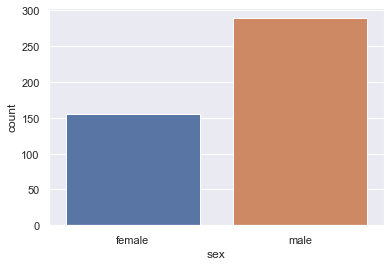

In [5]:
sns.countplot('sex', data=titanic_df)

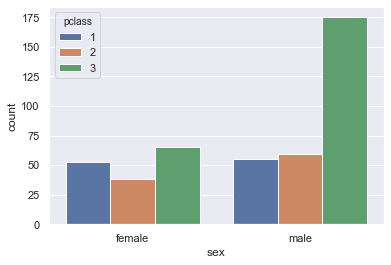

In [6]:
sns.countplot('sex', data=titanic_df, hue='pclass')

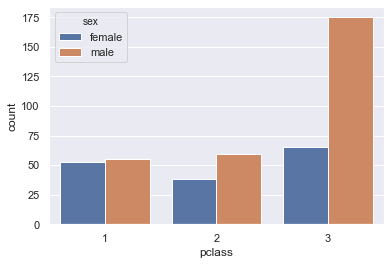

In [7]:
sns.countplot('pclass', data=titanic_df, hue='sex')

In [8]:
def male_female_child(passanger):
    age, sex = passanger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['person'] =  titanic_df[['age', 'sex']].apply(male_female_child, axis=1)

In [9]:
titanic_df.head()

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked,person
0,3,1,1,female,35.0,1,0,53.1000,S,female
1,4,0,3,male,35.0,0,0,8.0500,S,male
2,7,0,3,male,2.0,3,1,21.0750,S,child
3,9,1,2,female,14.0,1,0,30.0708,C,child
4,11,1,1,female,58.0,0,0,26.5500,S,female


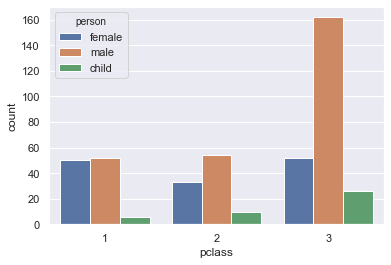

In [10]:
sns.countplot('pclass', data=titanic_df, hue='person')

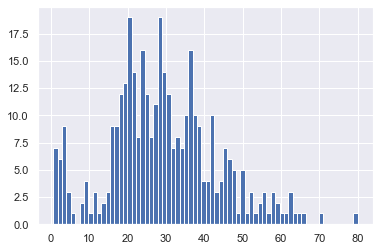

In [11]:
titanic_df['age'].hist(bins=70)

In [12]:
titanic_df['age'].mean()

29.211583333333333

In [13]:
titanic_df['person'].value_counts()

male      268
female    135
child      42
Name: person, dtype: int64

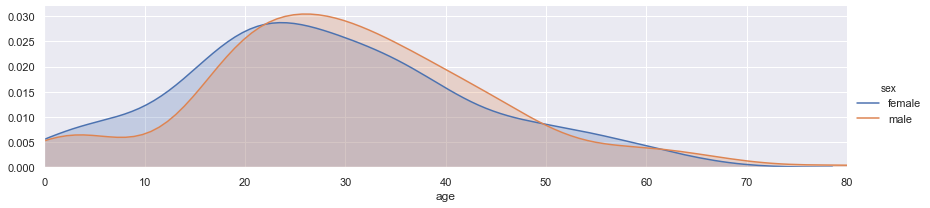

In [14]:
fig = sns.FacetGrid(titanic_df, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = titanic_df['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

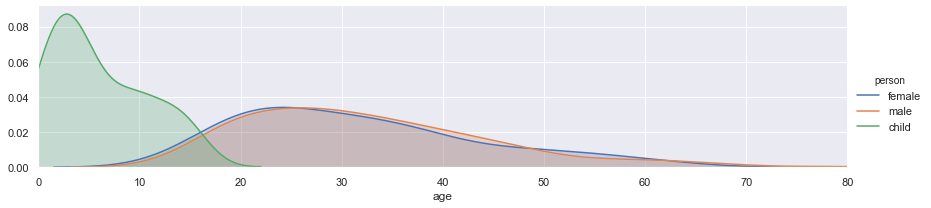

In [15]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = titanic_df['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

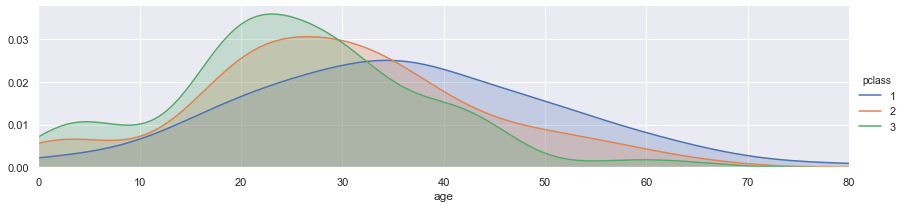

In [16]:
fig = sns.FacetGrid(titanic_df, hue='pclass', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = titanic_df['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [17]:
titanic_df.head()

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked,person
0,3,1,1,female,35.0,1,0,53.1000,S,female
1,4,0,3,male,35.0,0,0,8.0500,S,male
2,7,0,3,male,2.0,3,1,21.0750,S,child
3,9,1,2,female,14.0,1,0,30.0708,C,child
4,11,1,1,female,58.0,0,0,26.5500,S,female


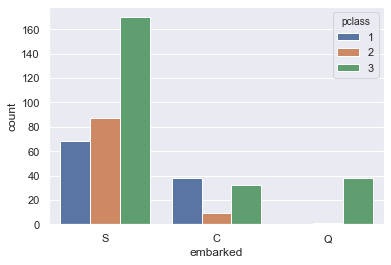

In [18]:
sns.countplot('embarked', data=titanic_df, hue='pclass')

In [19]:
from collections import Counter

In [20]:
Counter(titanic_df.embarked)

Counter({'S': 325, 'C': 79, 'Q': 39, nan: 2})

In [21]:
titanic_df.embarked.value_counts()

S    325
C     79
Q     39
Name: embarked, dtype: int64

In [22]:
titanic_df['alone'] = titanic_df.parch + titanic_df.sibsp
titanic_df['alone']

0      1
1      0
2      4
3      1
4      0
      ..
440    0
441    1
442    1
443    0
444    3
Name: alone, Length: 445, dtype: int64

In [23]:
titanic_df['alone'].loc[titanic_df['alone']>0] = 'with family'
titanic_df['alone'].loc[titanic_df['alone']==0] = 'alone'

C:\Users\unknow\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


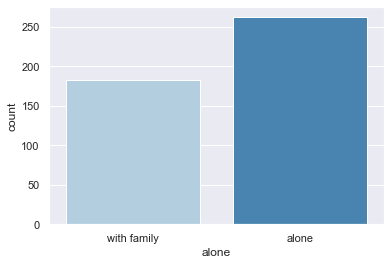

In [24]:
sns.countplot('alone', data=titanic_df, palette='Blues')

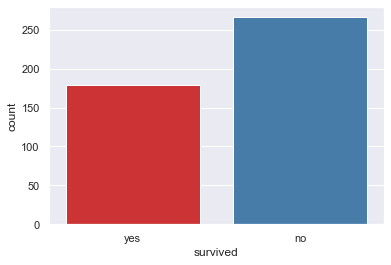

In [25]:
titanic_df['survived'] = titanic_df.survived.map({0:'no', 1:'yes'})
sns.countplot('survived', data=titanic_df, palette='Set1')

C:\Users\unknow\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


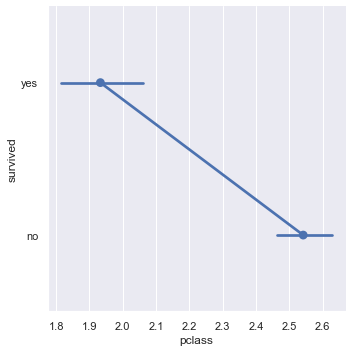

In [26]:
sns.factorplot('pclass', 'survived', data=titanic_df)

In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        445 non-null    int64  
 1   survived  445 non-null    object 
 2   pclass    445 non-null    int64  
 3   sex       445 non-null    object 
 4   age       360 non-null    float64
 5   sibsp     445 non-null    int64  
 6   parch     445 non-null    int64  
 7   fare      445 non-null    float64
 8   embarked  443 non-null    object 
 9   person    445 non-null    object 
 10  alone     445 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 38.4+ KB


## ロジスティック回帰（分類）

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [29]:
titanic_df

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked,person,alone
0,3,yes,1,female,35.0,1,0,53.1000,S,female,with family
1,4,no,3,male,35.0,0,0,8.0500,S,male,alone
2,7,no,3,male,2.0,3,1,21.0750,S,child,with family
3,9,yes,2,female,14.0,1,0,30.0708,C,child,with family
4,11,yes,1,female,58.0,0,0,26.5500,S,female,alone
...,...,...,...,...,...,...,...,...,...,...,...
440,873,no,3,male,47.0,0,0,9.0000,S,male,alone
441,874,yes,2,female,28.0,1,0,24.0000,C,female,with family
442,879,yes,1,female,56.0,0,1,83.1583,C,female,with family
443,884,no,3,male,25.0,0,0,7.0500,S,male,alone


In [30]:
clf = LogisticRegression()

In [31]:
X = pd.get_dummies(titanic_df[['person', 'alone']], drop_first=True)
y = titanic_df['survived']

In [32]:
trainX, testX, trainY, testY = train_test_split(X, y)

In [33]:
clf.fit(trainX, trainY)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
clf.score(trainX, trainY)

0.7927927927927928

In [35]:
clf.score(testX, testY)

0.8125

In [36]:
predict = clf.predict_proba(testX)

In [37]:
predict

array([[0.17409927, 0.82590073],
       [0.81675843, 0.18324157],
       [0.40944042, 0.59055958],
       [0.22765604, 0.77234396],
       [0.81675843, 0.18324157],
       [0.17409927, 0.82590073],
       [0.76120244, 0.23879756],
       [0.22765604, 0.77234396],
       [0.81675843, 0.18324157],
       [0.81675843, 0.18324157],
       [0.81675843, 0.18324157],
       [0.81675843, 0.18324157],
       [0.40944042, 0.59055958],
       [0.17409927, 0.82590073],
       [0.81675843, 0.18324157],
       [0.22765604, 0.77234396],
       [0.81675843, 0.18324157],
       [0.81675843, 0.18324157],
       [0.81675843, 0.18324157],
       [0.22765604, 0.77234396],
       [0.81675843, 0.18324157],
       [0.81675843, 0.18324157],
       [0.81675843, 0.18324157],
       [0.22765604, 0.77234396],
       [0.22765604, 0.77234396],
       [0.81675843, 0.18324157],
       [0.81675843, 0.18324157],
       [0.81675843, 0.18324157],
       [0.22765604, 0.77234396],
       [0.76120244, 0.23879756],
       [0.

In [38]:
clf.predict(testX)

array(['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no',
       'no'], dtype=object)

In [39]:
# display table
from IPython.display import display
display(titanic_df)

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked,person,alone
0,3,yes,1,female,35.0,1,0,53.1000,S,female,with family
1,4,no,3,male,35.0,0,0,8.0500,S,male,alone
2,7,no,3,male,2.0,3,1,21.0750,S,child,with family
3,9,yes,2,female,14.0,1,0,30.0708,C,child,with family
4,11,yes,1,female,58.0,0,0,26.5500,S,female,alone
...,...,...,...,...,...,...,...,...,...,...,...
440,873,no,3,male,47.0,0,0,9.0000,S,male,alone
441,874,yes,2,female,28.0,1,0,24.0000,C,female,with family
442,879,yes,1,female,56.0,0,1,83.1583,C,female,with family
443,884,no,3,male,25.0,0,0,7.0500,S,male,alone


In [40]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()

labelEncoder_X.fit_transform(titanic_df.person)

array([1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1,
       1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1,
       0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1,
       1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,

In [41]:
X

,person_female,person_male,alone_with family
0,1,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
440,0,1,0
441,1,0,1
442,1,0,1
443,0,1,0


In [42]:
#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0, solver='lbfgs')

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------------SVM -------------------------------------------------

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma='scale')

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())

Logistic Regression:
 Accuracy: 0.795589617101245 +/- 0.05748804772351698 

K-NN:
 Accuracy: 0.775233732675593 +/- 0.06629272657257931 

SVM:
 Accuracy: 0.7978623443739722 +/- 0.059643615270912546 

Naive Bayes:
 Accuracy: 0.7978623443739722 +/- 0.059643615270912546 

Random Forest:
 Accuracy: 0.7978623443739722 +/- 0.059643615270912546
